## LOGISTIC REGRESSION ALGORITHM


#### INTRODUCTION

This notebook showcases the implemention of the Logistic regression algorithm using the scikit-learn library. This notebook was developed from the scratch to demostrate a significant practical and theoretical understanding of the underlying machine learning algorithm. 

#### LOG OF CHANGES

This log embodies all the computations carrried out for this analysis and how they affect result of the analysis. The log is structured to follows the Cross Industry Standard Process for Data Mining (CRISP-DM) model, and the changes were logged under each of the six phases as follows:

**1. Business understanding**

The goal of this project is to build a logistic regression model to predict the likelihood of hypertension in some patients based on various medical attributes. The logistic regression model will serve a grat purpose in the health sector by facilitate early detection and intervention of hypertension.


**2. Data Understanding**

The dataset used for this analysis was gotten from kaggle (https://www.kaggle.com/datasets/prosperchuks/health-dataset). The dataset includes the 13 key parameters and a target variable representing whether or not a patient has the disease. Below is the data dictionary:

Age: Patient age

Sex: Gender (1: male; 0: female)

Cp: Chest Pain Type (0: asymptomatic 1: typical angina 2: atypical angina 3: non-anginal pain)

trestbps: Resting Blood Pressure

chol: Cholesterol 

fbs: Fasting Blood Sugar (blood sugar > 120 mg/dl (1: yes; 0: no))

restecg: Resting Electrocardiographic Results (Resting ECG results: 0: normal 1: ST-T wave abnormality )

thalach: Maximum Heart Rate 

exang: Exercise-Induced Angina ((1: yes; 0: no)sss)

oldpeak: ST Depression Induced by Exercise

ca: Number of Major Vessels Colored 

thal: Thalassemia Type:

**3. Data Preparation**

Before modelling, the data was preprocessed to make it fit for the analysis. Nulls in the sex column was filled with the mode.

**4. Modelling**

The following  were implemented during the modelling phase:

**a) Standardizing the features**

**Change:** All the features were standardized to keep them within the same scale

**Result:** The accuracy of the model was improved by 0.01 when the features were standardized.

**b) Using cross validation**

**Change:** The datset was splited into 5 folds via random sampling.

**Result:** This had little effect on the performance of the model as well.

**c) Examining different number of folds**

**Change:** A function was created to test different values of K, and examine the accuracy.

**Result:** The accuracy didn't change much when will alter the number of folds. 

**d) Hyperparameter tuning**

**Change:** The hyperparameters of the model were tune to improve the model's performance.

**Result:** The accuracy of the model of the model did not change significantly after hyperparameter tuning. 

**4. Evaluation:**

The performance of the model was evaluated using various metric scores including accuracy, precision, recall and f1-score.


**5. Deployment:**

The best model was saved as a pickle file and was deployed as a web application which which runs locally. The name of the web app is Hypert_app, which will be remotely hosted before the final submission.



#### ANALYSIS

First things first, let's import the neccessary libraries.


#### 

In [132]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


Next, we will load the data set and take a look at it.

In [133]:
# load the drug analysis dataset
df = pd.read_csv('hypertension_data.csv')

In [134]:
# check the first few rows of the dataframe
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
# Examine the shape of the dataset
df.shape

(26083, 14)

Now, we will check the distribution of the target variable

In [92]:
df.target.value_counts()

target
1    14274
0    11809
Name: count, dtype: int64

The distribution shows that the dataset is well balanced

In [93]:
# Examine the columns in the dataframe
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [94]:
# check for missing values
df.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

Only the sex column contains missing values in the dataset

Now we will fill the missing values in the sex column with the mode in the column.

In [95]:
# fill missing values in sex with the mode
df['sex'].fillna(df['sex'].mode().iloc[0], inplace=True)

In [96]:
# re-check for nulls
df.isnull().sum().sum()

0

All the missing values have been succesfully filled.

Great! Now we can proceed to train a Logistic classifier using the dataset.

In [97]:
# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# take a copy of the features
features = X.copy()


In [98]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Now, we can split the dataset into a training set and a test set. We will use 80% of the data for training and 20% for testing.

In [99]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Create a logistic regression model
log = LogisticRegression(random_state=42)

In [101]:
# Fit the model
log.fit(X_train, y_train)

c:\Users\akint\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [102]:
# Make predictions on the test set
y_pred = log.predict(X_test)

In [103]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.846


In [104]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1798,  539],
       [ 267, 2613]], dtype=int64)

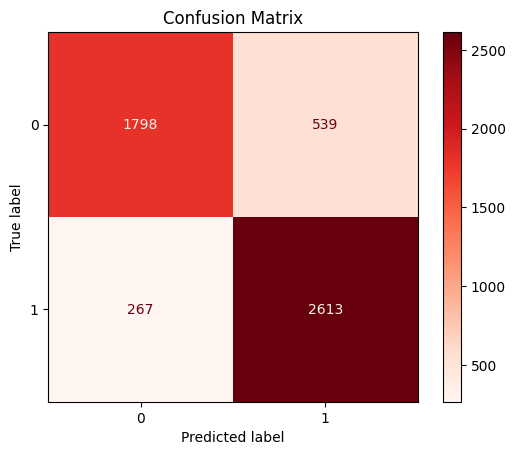

In [105]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()

In [106]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2337
           1       0.83      0.91      0.87      2880

    accuracy                           0.85      5217
   macro avg       0.85      0.84      0.84      5217
weighted avg       0.85      0.85      0.84      5217



The model's accuracy is 0.85. We will attempt to improve the model's performance through cross-validation and hyperparameter tuning.

Next we will standardize the features using the StandardScaler class from the scikit-learn library and compare the results.

In [107]:
# standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Now, we can split the standardized dataset into a training set and a test set. We will use 80% of the data for training and 20% for testing.

In [108]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Create a Logistic regression Classifier instance
log1 =  LogisticRegression(random_state=42)

In [110]:
# Fit the model
log1.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [111]:
# Make predictions on the test set
y_pred = log1.predict(X_test)

In [112]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.856


In [113]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1823,  514],
       [ 238, 2642]], dtype=int64)

In [114]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      2337
           1       0.84      0.92      0.88      2880

    accuracy                           0.86      5217
   macro avg       0.86      0.85      0.85      5217
weighted avg       0.86      0.86      0.85      5217



Standardizing has some effect on the model. The model's accuracy improved by 0.01.

#### Using cross validation

Now, we will use cross-validation to evaluate the model's performance. This will be achieved by splitting the dataset into 5 folds and training the model on 4 folds and testing it on the remaining fold. This process will be repeated 5 times, with each fold serving as the test set once. The average accuracy of the model will be calculated.

In [115]:
# Create a Random Forest Classifier instance
log2 = LogisticRegression(random_state=42)


In [137]:
# Use cross-validation to evaluate the model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [117]:
# Perform cross-validated scoring
cv_scores  = cross_val_score(knn3, X, y, scoring='accuracy', cv=cv)

In [118]:
# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-validated Accuracy Scores: [0.86256469 0.86141461 0.86083956 0.86138804 0.85927914]
Mean Accuracy: 0.8610972078657433


There a little difference in the accuracy of the model after the cross-validation. 

#### Create a function to perform cross-validation

In [119]:
def cross_val_accuracy(X, y, folds):
    
    log3 = LogisticRegression(random_state=42)

    # Perform cross-validation and get accuracy scores for each fold
    accuracy_scores = cross_val_score(log3, X, y, cv=folds)

    # Calculate mean accuracy
    mean_accuracy = np.mean(accuracy_scores)

    return accuracy_scores, mean_accuracy


In [120]:
# trying a range of folds
for i in range(2, 10):
    print(f'For {i} folds:')
    accuracy_scores, mean_accuracy = cross_val_accuracy(X, y, i)
    print(f'Accuracy scores: {accuracy_scores}')
    print(f'Mean accuracy: {mean_accuracy:.4f}')
    print('\n')


For 2 folds:
Accuracy scores: [0.86045085 0.85783299]
Mean accuracy: 0.8591


For 3 folds:
Accuracy scores: [0.8600345  0.85955832 0.85691281]
Mean accuracy: 0.8588


For 4 folds:
Accuracy scores: [0.85815059 0.85953075 0.85891734 0.85843558]
Mean accuracy: 0.8588


For 5 folds:
Accuracy scores: [0.85758099 0.86237301 0.86237301 0.8577454  0.85889571]
Mean accuracy: 0.8598


For 6 folds:
Accuracy scores: [0.85763569 0.86197378 0.8610536  0.85898321 0.85852312 0.85714286]
Mean accuracy: 0.8592


For 7 folds:
Accuracy scores: [0.8604776  0.85882984 0.86097692 0.86339238 0.86097692 0.85426731
 0.86070853]
Mean accuracy: 0.8599


For 8 folds:
Accuracy scores: [0.86292548 0.85771236 0.86660534 0.85552147 0.86104294 0.85920245
 0.85429448 0.86104294]
Mean accuracy: 0.8598


For 9 folds:
Accuracy scores: [0.86167644 0.85955832 0.86128364 0.86404417 0.8657695  0.85783299
 0.85921325 0.85852312 0.85852312]
Mean accuracy: 0.8607




The above result shows that the model's accuracy is consistent across different folds. This is a good sign that the model is not overfitting to the training data.

#### Hyperparameter tuning

Now we will attempt to tune the hyperparameters of the Logistic Regression model using GridSearchCV

In [121]:
#fit the model
log4 = LogisticRegression(random_state=42)

In [122]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [ 0.1, 1, ],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],   
}

In [123]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=log4, param_grid=param_grid, cv=5, scoring='accuracy')

In [124]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [125]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [126]:
# check the best parameters
best_params

{'C': 0.1, 'solver': 'newton-cg'}

In [127]:
# Use the best model to make predictions
y_pred = best_estimator.predict(X_test)

In [128]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}
Accuracy: 0.8559


The accuracy of the model of the model did not change significantly after hyperparameter tuning. 

#### Saving the model as a pickle file

In [131]:
# Save the model to a file using pickle
with open('log.pkl', 'wb') as file:
    pickle.dump(log, file)